# Random Forest

In [38]:
# CONTEXT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# IMPORTING THE UTILS FOR MANIPULATE THE DATASET
import sys
sys.path.append('../Classifiers/')
from dataset_utils import *

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

Import the dataset and generate the one we'll use for the classification with the fake and the real users

In [41]:
# IMPORT THE ORIGINAL DATASET
df_real = pd.read_csv('../../data/balanced_real_data.csv')
df_fake = pd.read_csv('../../data/balanced_fake_data.csv')
dataset=pd.concat([df_real,df_fake],ignore_index=True)
dataset=fix_private_entries(dataset)

In [42]:
dataset.head(10)

,profile_pic,biography,follows_count,followed_by_count,ff_ratio,media_count,is_private,is_verified,is_business_account,is_joined_recently,...,std_comments,var_comments,skw_comments,mean_time_between_posts,max_time_between_posts,min_time_between_posts,std_time_between_posts,var_time_between_posts,skw_time_between_posts,real_account
0,True,45,2979,846,0.283988,278,False,False,False,False,...,4.964205,2.464333e+01,1.759163,1.688451e+06,7930005.0,75731.0,1.964306e+06,3.858496e+12,1.947676,True
1,True,131,966,5172,5.354037,150,False,False,True,False,...,0.472582,2.233333e-01,2.951336,1.978352e+05,851011.0,3855.0,2.222041e+05,4.937467e+10,1.785389,True
2,True,128,1662,1475,0.887485,403,False,False,True,False,...,5.961543,3.554000e+01,1.546427,2.950338e+05,1128895.0,9212.0,2.417832e+05,5.845911e+10,1.726161,True
3,True,0,236,111,0.470339,43,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,True,16,386,967516,2506.518135,34,False,True,True,False,...,1180.090381,1.392613e+06,0.319856,2.418942e+06,12726352.0,36.0,2.814164e+06,7.919517e+12,2.273966,True
5,True,103,2544,1652183,649.443003,9670,False,True,False,False,...,49.513466,2.451583e+03,1.172048,7.948950e+04,287585.0,5895.0,7.382074e+04,5.449502e+09,1.315021,True
6,True,150,410,70481,171.904878,2459,False,False,True,False,...,82.691253,6.837843e+03,0.989691,3.742878e+05,827086.0,86472.0,2.019481e+05,4.078303e+10,0.286078,True
7,True,15,1269,1311,1.033097,24,False,False,True,False,...,1.742479,3.036232e+00,0.746906,4.613034e+06,24784763.0,433680.0,5.338513e+06,2.849972e+13,2.462336,True
8,True,0,755,2959,3.919205,225,False,False,True,False,...,4.325506,1.871000e+01,1.069453,1.003002e+05,413788.0,16256.0,8.768568e+04,7.688778e+09,2.289149,True
9,True,116,336,1693459,5040.056548,4214,False,True,True,False,...,153.991472,2.371337e+04,2.851830,5.910004e+04,278030.0,1313.0,7.192136e+04,5.172681e+09,2.133841,True


In [43]:
# TAKE THE TRAINSET AND THE TARGET FROM DATASET
trainset=get_trainset(dataset)
targets=get_target_dataset(dataset)

# Classification without the Statistics from the Media of the Users 

In [44]:
# DELETING THE STATISTICS OF THE USERS CONTENTS
trainset_without_stats=drop_stats(trainset)

In [45]:
# TRAINING THE DECISION TREE WITHOUT STATISTICS OF THE USERS CONTENTS
x_train, x_test, y_train, y_test = train_test_split(trainset_without_stats, targets, test_size = 0.2, random_state = 12345)
rf = RandomForestClassifier(n_estimators=7,random_state=0)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

# Confusion Matrix 

In [46]:
print(confusion_matrix(y_test, predictions))


[[1424  137]
 [ 129 1372]]


# Classification Report

In [47]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

       False       0.92      0.91      0.91      1561
        True       0.91      0.91      0.91      1501

    accuracy                           0.91      3062
   macro avg       0.91      0.91      0.91      3062
weighted avg       0.91      0.91      0.91      3062



# Test of the parameters

In [48]:
err = []

for i in range(1, 30):
    
    rf = RandomForestClassifier(n_estimators=i,random_state=0)
    rf.fit(x_train, y_train)
    pred_i = rf.predict(x_test)
    err.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasso di errore')

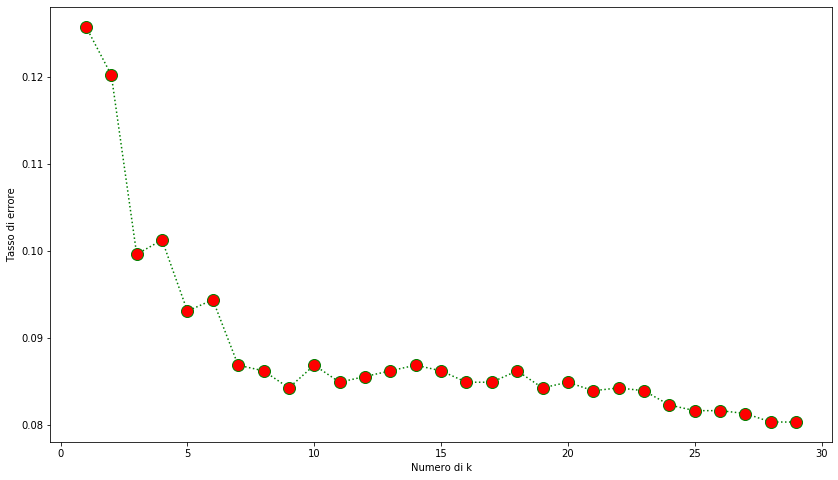

In [49]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 30), err, color='green', linestyle='dotted', marker='o',
         markerfacecolor='red', markersize=12)
plt.xlabel('Numero di k')
plt.ylabel('Tasso di errore')

# CrossValidation with 10-Fold

In [50]:
rf_cross = RandomForestClassifier(n_estimators=7,random_state=0)
# Perform 10-fold cross validation 
scores = cross_val_score(estimator=rf_cross, X=trainset_without_stats, y=targets, cv=10, n_jobs=4)
print('Accuracy with 10-Fold CrossValidation:  '+str(scores.mean()))

Accuracy with 10-Fold CrossValidation:  0.9084786429802557


# Classification with only Public Profile (with Media Stats)

In [51]:
# CLASSIFICATION OF ONLY PUBLIC PROFILES
dataset_publics=drop_NaN_entries(dataset)
trainset_publics=get_trainset(dataset_publics)
targets_publics=get_target_dataset(dataset_publics)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(trainset_publics, targets_publics, test_size = 0.2, random_state = 12345)
rf = RandomForestClassifier(n_estimators=7,random_state=0)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

# Confusion Matrix 

In [53]:
print(confusion_matrix(y_test, predictions))

[[1068   85]
 [  94 1045]]


# Classification Report

In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.92      0.93      0.92      1153
        True       0.92      0.92      0.92      1139

    accuracy                           0.92      2292
   macro avg       0.92      0.92      0.92      2292
weighted avg       0.92      0.92      0.92      2292



# Test of the parameters

In [55]:
err = []

for i in range(1, 30):
    
    rf = RandomForestClassifier(n_estimators=i,random_state=0)
    rf.fit(x_train, y_train)
    pred_i = rf.predict(x_test)
    err.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasso di errore')

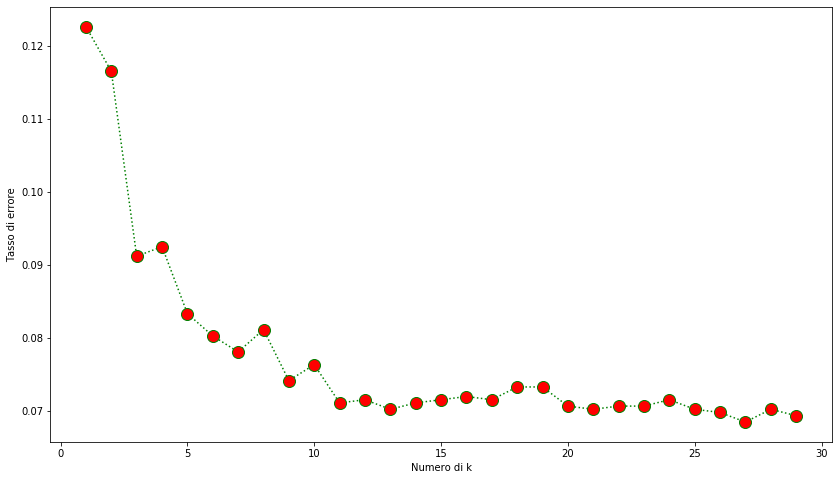

In [56]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 30), err, color='green', linestyle='dotted', marker='o',
         markerfacecolor='red', markersize=12)
plt.xlabel('Numero di k')
plt.ylabel('Tasso di errore')

# CrossValidation with 10-Fold

In [57]:
rf_cross = RandomForestClassifier(n_estimators=7,random_state=0)
# Perform 10-fold cross validation 
scores = cross_val_score(estimator=rf_cross, X=trainset_publics, y=targets_publics, cv=10, n_jobs=4)
print('Accuracy with 10-Fold CrossValidation:  '+str(scores.mean()))

Accuracy with 10-Fold CrossValidation:  0.9202293028394853


# Classification with NaN Values replaced with Median

In [58]:
# CLASSIFICATION WITH NaN VALUES REPLACED WITH STATISTICS
dataset_median=fill_NaN_median(dataset)
trainset_median=get_trainset(dataset_median)
targets_median=get_target_dataset(dataset_median)
print(dataset_median.shape)

(15308, 30)


In [59]:
x_train, x_test, y_train, y_test = train_test_split(trainset_median, targets_median, test_size = 0.2, random_state = 12345)
rf = RandomForestClassifier(n_estimators=9,random_state=0)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

# Confusion Matrix 

In [60]:
print(confusion_matrix(y_test, predictions))

[[1486   75]
 [ 114 1387]]


# Classification Report

In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.93      0.95      0.94      1561
        True       0.95      0.92      0.94      1501

    accuracy                           0.94      3062
   macro avg       0.94      0.94      0.94      3062
weighted avg       0.94      0.94      0.94      3062



# Test of the parameters

# err = []

for i in range(1, 30):
    
    rf = RandomForestClassifier(n_estimators=i,random_state=0)
    rf.fit(x_train, y_train)
    pred_i = rf.predict(x_test)
    err.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasso di errore')

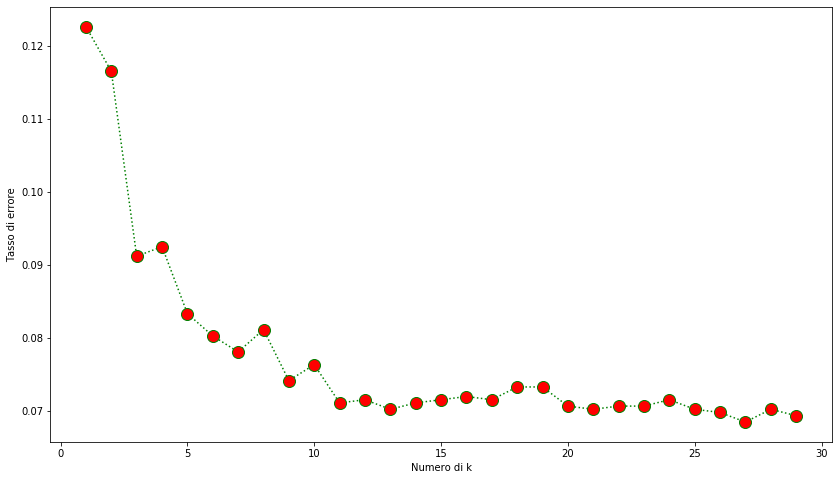

In [62]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 30), err, color='green', linestyle='dotted', marker='o',
         markerfacecolor='red', markersize=12)
plt.xlabel('Numero di k')
plt.ylabel('Tasso di errore')

In [63]:
# CrossValidation with 10-Fold

In [64]:
rf_cross = RandomForestClassifier(n_estimators=7,random_state=0)
# Perform 10-fold cross validation 
scores = cross_val_score(estimator=rf_cross, X=trainset_median, y=targets_median, cv=10, n_jobs=4)
print('Accuracy with 10-Fold CrossValidation:  '+str(scores.mean()))

Accuracy with 10-Fold CrossValidation:  0.9288609020631752
